<a href="https://colab.research.google.com/github/mohamedelgawish511-bot/ai-platform-assigments/blob/main/assigment%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cuda


100%|██████████| 26.4M/26.4M [00:03<00:00, 8.36MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 141kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.63MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.2MB/s]


Number of training samples: 60000
Number of test samples: 10000
Number of batches in train_loader: 938
Number of batches in test_loader: 157
SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)
Starting training...
Epoch [1/10] - Train Loss: 0.5200, Train Acc: 81.43% - Test Loss: 0.4113, Test Acc: 85.36%
Epoch [2/10] - Train Loss: 0.3704, Train Acc: 86.38% - Test Loss: 0.3946, Test Acc: 85.94%
Epoch [3/10] - Train Loss: 0.3300, Train Acc: 87.89% - Test Loss: 0.3546, Test Acc: 87.01%
Epoch [4/10] - Train Loss: 0.3065, Train Acc: 88.72% - Test Loss: 0.3493, Test Acc: 87.30%
Epoch [5/10] - Train Loss: 0.2895, Train Acc: 89.29% - Test Loss: 0.3503, Test Acc: 87.42%
Epoch [6/10] - Train Loss: 0.2729, Train Acc: 89.88% - Test Loss: 0.3437, Test A

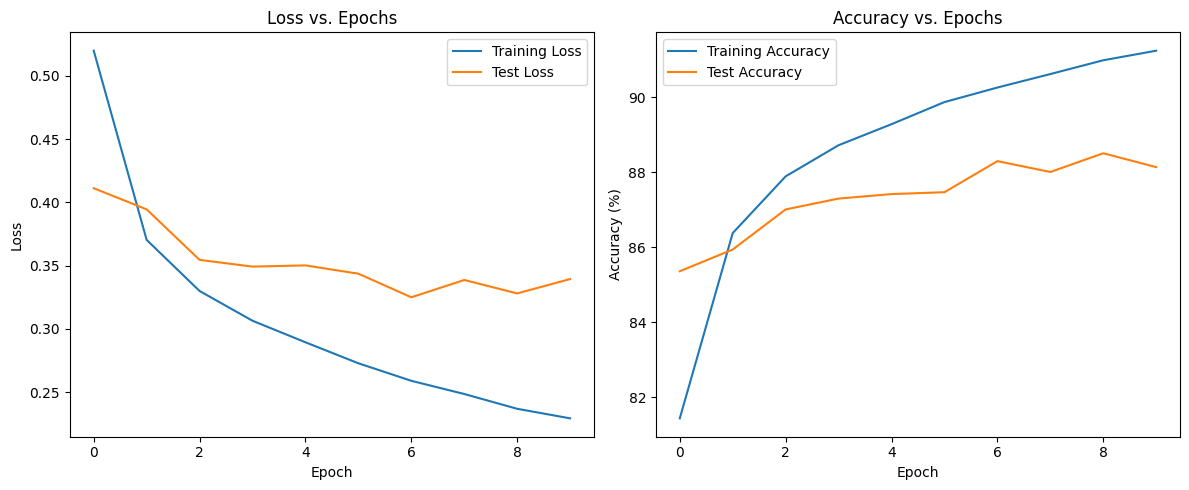


Generating Confusion Matrix...


<Figure size 1000x1000 with 0 Axes>

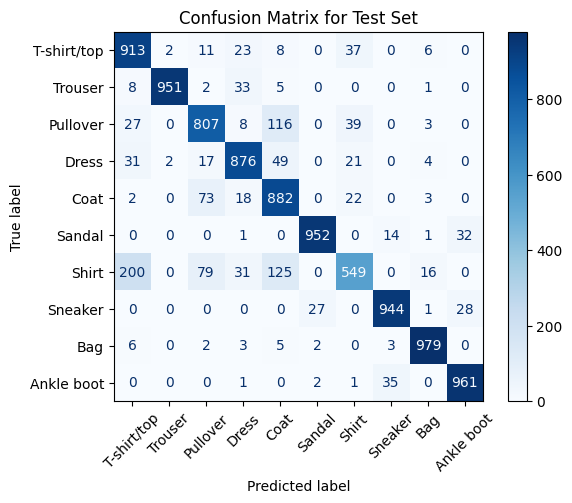


Showing example predictions...


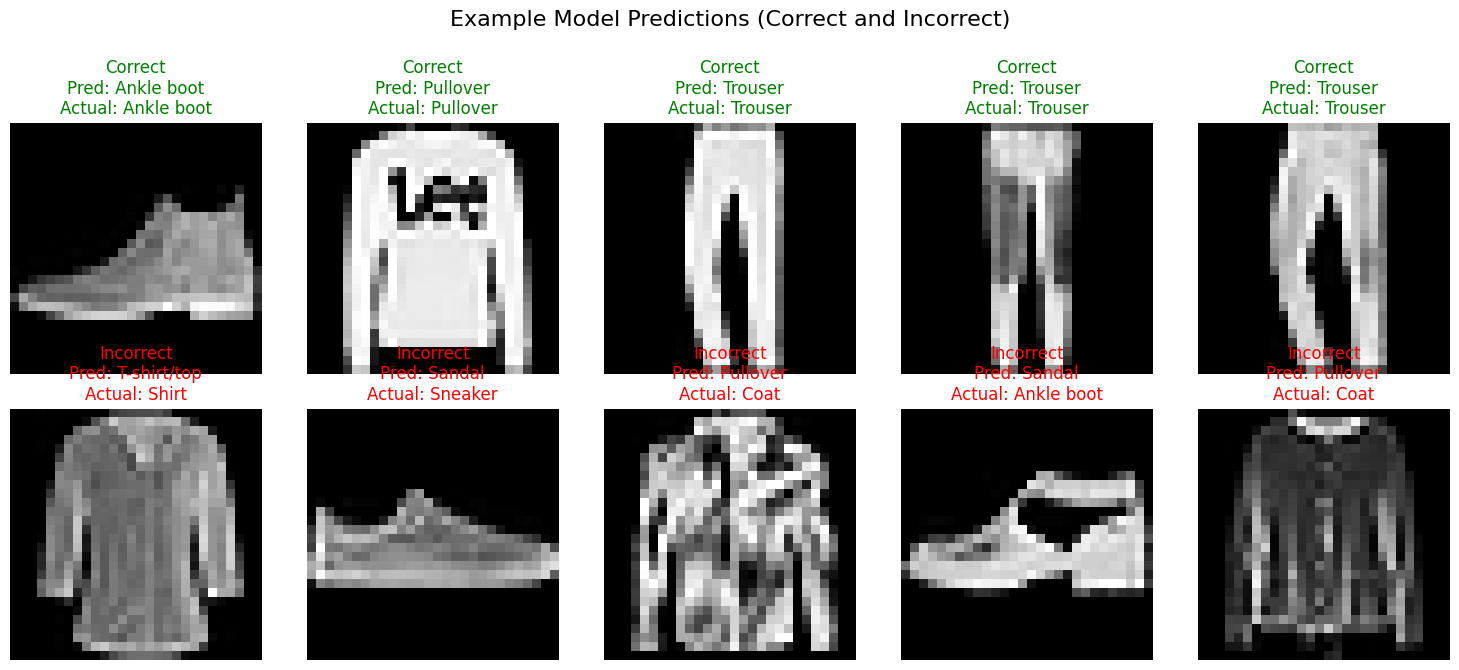

In [1]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


LEARNING_RATE = 0.001
BATCH_SIZE = 64
EPOCHS = 10
transform = transforms.Compose([
    transforms.ToTensor()
])


train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)


test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)


train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False

)


classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")
print(f"Number of batches in train_loader: {len(train_loader)}")
print(f"Number of batches in test_loader: {len(test_loader)}")



class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()


        self.flatten = nn.Flatten()


        self.layers = nn.Sequential(

            nn.Linear(28 * 28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):

        x = self.flatten(x)

        logits = self.layers(x)
        return logits


model = SimpleNN().to(device)
print(model)


criterion = nn.CrossEntropyLoss()


optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


history = {
    'train_loss': [],
    'train_acc': [],
    'test_loss': [],
    'test_acc': []
}

print("Starting training...")

for epoch in range(EPOCHS):
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0


    for images, labels in train_loader:

        images = images.to(device)
        labels = labels.to(device)


        outputs = model(images)
        loss = criterion(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        running_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()


    epoch_train_loss = running_train_loss / len(train_loader)
    epoch_train_acc = 100 * correct_train / total_train
    history['train_loss'].append(epoch_train_loss)
    history['train_acc'].append(epoch_train_acc)


    model.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)


            running_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()


    epoch_test_loss = running_test_loss / len(test_loader)
    epoch_test_acc = 100 * correct_test / total_test
    history['test_loss'].append(epoch_test_loss)
    history['test_acc'].append(epoch_test_acc)


    print(f"Epoch [{epoch+1}/{EPOCHS}] - "
          f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}% - "
          f"Test Loss: {epoch_test_loss:.4f}, Test Acc: {epoch_test_acc:.2f}%")

print("Finished Training.")



print("\n--- Final Evaluation Results ---")


final_train_acc = history['train_acc'][-1]
final_test_acc = history['test_acc'][-1]

print(f"Final Training Accuracy: {final_train_acc:.2f}%")
print(f"Final Test Accuracy: {final_test_acc:.2f}%")

if final_test_acc > 85:
    print(f"Success! Test accuracy ({final_test_acc:.2f}%) is higher than 85%.")
else:
    print(f"Note: Test accuracy ({final_test_acc:.2f}%) is not higher than 85%. "
          f"Try training for more epochs or adjusting the model.")




plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Training Accuracy')
plt.plot(history['test_acc'], label='Test Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


print("\nGenerating Confusion Matrix...")

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Confusion Matrix for Test Set')
plt.show()


print("\nShowing example predictions...")

dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)

outputs = model(images)
_, preds = torch.max(outputs, 1)

images = images.cpu().numpy()
labels = labels.cpu().numpy()
preds = preds.cpu().numpy()

fig = plt.figure(figsize=(15, 7))
fig.suptitle('Example Model Predictions (Correct and Incorrect)', fontsize=16)

correct_indices = np.where(preds == labels)[0]
for i, idx in enumerate(correct_indices[:5]):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[idx][0], cmap='gray')
    ax.set_title(f"Correct\nPred: {classes[preds[idx]]}\nActual: {classes[labels[idx]]}", color='green')
    ax.axis('off')

incorrect_indices = np.where(preds != labels)[0]
if len(incorrect_indices) > 0:
    for i, idx in enumerate(incorrect_indices[:5]):
        ax = plt.subplot(2, 5, i + 6)
        plt.imshow(images[idx][0], cmap='gray')
        ax.set_title(f"Incorrect\nPred: {classes[preds[idx]]}\nActual: {classes[labels[idx]]}", color='red')
        ax.axis('off')
else:
    print("No incorrect predictions found in this batch to display.")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()